In [4]:
import pandas as pd

In [5]:
train  = pd.read_csv('Housing_dataset_train.csv')
test  = pd.read_csv("Housing_dataset_test.csv")

In [6]:
loc  = pd.read_csv("location.csv")

In [7]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [9]:
loc.head()

,loc,Latitude,Longitude
0,Katsina,12.563083,7.620706
1,Ondo,7.020969,5.056748
2,Ekiti,7.736891,5.273833
3,Anambra,6.218314,6.953184
4,Kogi,7.794960,6.686867


In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]
df=pd.concat([train,test])

In [11]:
# feature_generation(df)
df  = pd.merge(df,loc,on  = "loc",how  = "left")

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label = LabelEncoder()

In [14]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,Latitude,Longitude
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,12.563083,7.620706
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,7.020969,5.056748
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,7.736891,5.273833
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,6.218314,6.953184
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,7.794960,6.686867


In [15]:
df.bedroom.unique()

array([ 2., nan,  7.,  5.,  3.,  1.,  4.,  6.,  9.,  8.])

In [776]:
# Calculate average bedroom per location
bedroom  = df.groupby('title')['bedroom'].mean()

In [777]:
df.parking_space  = df.parking_space.fillna(0)

In [779]:
df["num"] = df['bedroom'] + df['bathroom'] +df.parking_space

In [783]:
# df[df["loc"] == 'Lagos']
ordered_labels = df.groupby('loc').mean()["price"].sort_values().index
ordered_labels

Index(['Kebbi', 'Ebonyi', 'Sokoto', 'Zamfara', 'Abia', 'Borno', 'Jigawa',
       'Yobe', 'Kogi', 'Bauchi', 'Kaduna', 'Taraba', 'Gombe', 'Niger', 'Kwara',
       'Adamawa', 'Benue', 'Plateau', 'Katsina', 'Nasarawa', 'Imo', 'Kano',
       'Ekiti', 'Osun', 'Enugu', 'Ondo', 'Oyo', 'Edo', 'Anambra',
       'Cross River', 'Ogun', 'Delta', 'Akwa Ibom', 'Rivers', 'Bayelsa',
       'Lagos'],
      dtype='object', name='loc')

In [784]:
# next let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'Kebbi': 0,
 'Ebonyi': 1,
 'Sokoto': 2,
 'Zamfara': 3,
 'Abia': 4,
 'Borno': 5,
 'Jigawa': 6,
 'Yobe': 7,
 'Kogi': 8,
 'Bauchi': 9,
 'Kaduna': 10,
 'Taraba': 11,
 'Gombe': 12,
 'Niger': 13,
 'Kwara': 14,
 'Adamawa': 15,
 'Benue': 16,
 'Plateau': 17,
 'Katsina': 18,
 'Nasarawa': 19,
 'Imo': 20,
 'Kano': 21,
 'Ekiti': 22,
 'Osun': 23,
 'Enugu': 24,
 'Ondo': 25,
 'Oyo': 26,
 'Edo': 27,
 'Anambra': 28,
 'Cross River': 29,
 'Ogun': 30,
 'Delta': 31,
 'Akwa Ibom': 32,
 'Rivers': 33,
 'Bayelsa': 34,
 'Lagos': 35}

In [785]:
df["Neighborhood"] = df["loc"].map(ordinal_mapping)

In [786]:
# df['bed_bath_comb'] = df['bedroom'] + df['bathroom']


In [787]:
from geopy.distance import geodesic
landmark_coords = (6.455057, 3.394179)  # Replace with landmark coordinates
df['distance_to_landmark'] = df.apply(lambda x: 
                                      geodesic((x['Latitude'], x['Longitude']), 
                                               landmark_coords).km, axis=1)


In [789]:
df["augment"] = df["loc"] + df["title"]

In [790]:
# df["loc"] = label.fit_transform(df['loc'])

In [791]:
# df["title"] = label.fit_transform(df['title'])

In [792]:
df['loc']  = df['loc'].astype(str)
df['title']  = df['title'].astype(str)
df['augment']  = df['augment'].astype(str)

In [793]:
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price',
       'Latitude', 'Longitude', 'num', 'Neighborhood', 'distance_to_landmark',
       'augment'],
      dtype='object')

In [794]:

categorical_features = ['loc',"title","augment"]

In [798]:
#Get the new dataset
train = df[:ntrain]
test = df[ntrain:]

In [799]:
X = train.drop(["ID","price"], axis = 1)
y  = train["price"]

In [800]:
tes = test.drop(["ID","price"],axis  = 1  )

In [801]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb1=[]
y_pred_totcb1=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # m1=CatBoostRegressor(n_estimators=1000,eval_metric='RMSE',max_depth=4,learning_rate=0.1,od_wait=50, reg_lambda=3,
    #                           bootstrap_type='Bayesian',
    #                  use_best_model=True)
    m1=CatBoostRegressor(cat_features= categorical_features,n_estimators=1000,eval_metric='RMSE',max_depth=3,
                         learning_rate=0.1,od_wait=50, reg_lambda=3,
                              bootstrap_type='Bayesian',
                     use_best_model=True)
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m1.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb1.append(sqrt(mean_squared_error(y_test,preds)))
    p1 = m1.predict(tes)
    y_pred_totcb1.append(p1)

0:	learn: 1030832.4976641	test: 1030588.2528362	test1: 1026089.7590556	best: 1026089.7590556 (0)	total: 2.41ms	remaining: 2.4s
100:	learn: 543054.5799247	test: 535904.7604631	test1: 493876.3118274	best: 493876.3118274 (100)	total: 152ms	remaining: 1.36s
200:	learn: 530944.8379508	test: 525585.3495917	test1: 485192.2277081	best: 485192.2277081 (200)	total: 293ms	remaining: 1.17s
300:	learn: 524647.7081063	test: 520669.0008478	test1: 481182.0293311	best: 481182.0293311 (300)	total: 427ms	remaining: 992ms
400:	learn: 519598.1078322	test: 516365.3055811	test1: 477896.8970963	best: 477817.5302060 (396)	total: 563ms	remaining: 840ms
500:	learn: 514811.8933320	test: 512852.0539441	test1: 476433.3976369	best: 476361.6111055 (493)	total: 689ms	remaining: 686ms
600:	learn: 511485.2919707	test: 510556.4796199	test1: 474834.3124404	best: 474574.7324079 (585)	total: 821ms	remaining: 545ms
700:	learn: 508468.4481890	test: 508434.3713124	test1: 474129.8614657	best: 473732.7233976 (677)	total: 949ms	r

In [802]:
import numpy as np
np.mean(errcb1)
# 543489.12700434
# 530378.7655414446
# 524530.9891428751
# 521081.18486009946
# 522915.3224709265

520406.9605492967

In [804]:
d = {"ID": test.ID, 'price': np.mean(y_pred_totcb1, 0)}
pred = pd.DataFrame(data=d)

In [805]:
pred.to_csv("doings_resume2_ne.csv",index  = False)

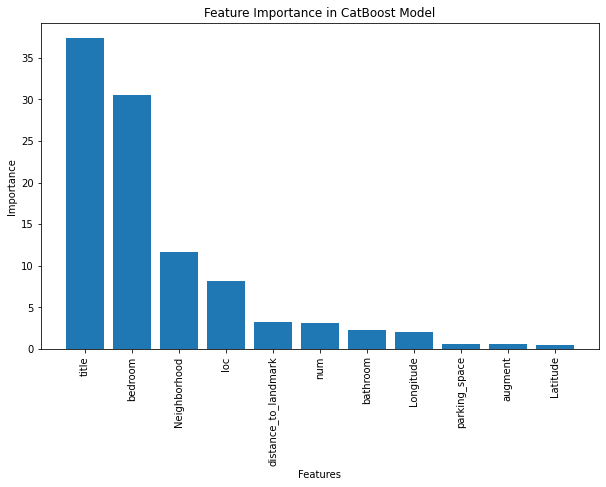

In [806]:
# Feature importance plot
import matplotlib.pyplot as plt
feature_importance = m1.get_feature_importance()
feature_names = X.columns

# Create a DataFrame to store feature importance results
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sort the DataFrame by feature importance values
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()

In [807]:
importance_df

,feature,importance
1,title,37.308306
2,bedroom,30.522808
8,Neighborhood,11.688783
0,loc,8.197827
9,distance_to_landmark,3.246537
7,num,3.144468
3,bathroom,2.275879
6,Longitude,2.007286
4,parking_space,0.596224
10,augment,0.553881


In [808]:
df.corr()

,ID,bedroom,bathroom,parking_space,price,Latitude,Longitude,num,Neighborhood,distance_to_landmark
ID,1.000000,0.226893,0.339646,0.135973,0.167093,-0.002820,-0.011406,0.353763,0.005854,-0.004851
bedroom,0.226893,1.000000,0.234478,0.092787,0.529145,0.001396,-0.004843,0.737338,0.009581,-0.000065
bathroom,0.339646,0.234478,1.000000,0.140224,0.221544,0.003460,0.002846,0.683787,0.002247,0.003724
parking_space,0.135973,0.092787,0.140224,1.000000,0.087125,0.036374,0.012537,0.550319,-0.002015,0.036267
price,0.167093,0.529145,0.221544,0.087125,1.000000,-0.039443,-0.163702,0.453771,0.402965,-0.045306
Latitude,-0.002820,0.001396,0.003460,0.036374,-0.039443,1.000000,0.461442,0.026814,-0.605115,0.983224
Longitude,-0.011406,-0.004843,0.002846,0.012537,-0.163702,0.461442,1.000000,0.006558,-0.394754,0.588781
num,0.353763,0.737338,0.683787,0.550319,0.453771,0.026814,0.006558,1.000000,0.004110,0.025715
Neighborhood,0.005854,0.009581,0.002247,-0.002015,0.402965,-0.605115,-0.394754,0.004110,1.000000,-0.581911
distance_to_landmark,-0.004851,-0.000065,0.003724,0.036267,-0.045306,0.983224,0.588781,0.025715,-0.581911,1.000000
